** breast cancer prediction **

In [235]:
import pandas as pd
import numpy as np
import plotly.express as px

In [236]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [237]:
breast_cancer_df = pd.read_csv('breast_cancer_dataset.csv')
breast_cancer_df.head(2)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead


In [238]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    int64  
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [239]:
breast_cancer_df.shape

(334, 16)

In [240]:
# setiing Patient_ID column as index , coz Patient_ID is a unique column
breast_cancer_df.set_index('Patient_ID', inplace=True)

In [241]:
breast_cancer_df['Date_of_Surgery'] = pd.to_datetime(breast_cancer_df['Date_of_Surgery'], format='%d-%b-%y')
breast_cancer_df['Date_of_Surgery'] = breast_cancer_df['Date_of_Surgery'].dt.strftime('%d/%m/%Y')
breast_cancer_df['Date_of_Surgery'] = pd.to_datetime(breast_cancer_df['Date_of_Surgery'], format='%d/%m/%Y')

In [242]:
breast_cancer_df['Date_of_Last_Visit'] = pd.to_datetime(breast_cancer_df['Date_of_Last_Visit'], format='%d-%b-%y')
breast_cancer_df['Date_of_Last_Visit'] = breast_cancer_df['Date_of_Last_Visit'].dt.strftime('%d/%m/%Y')
breast_cancer_df['Date_of_Last_Visit'] = pd.to_datetime(breast_cancer_df['Date_of_Last_Visit'], format='%d/%m/%Y')

In [243]:
breast_cancer_df.head(2)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
Patient_ID,,,,,,,,,,,,,,,
TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive
TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead


In [244]:
col_name = breast_cancer_df.columns
col_name

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [245]:
for column in breast_cancer_df.select_dtypes(include=['object']).columns:
    print(column, ':', breast_cancer_df[column].unique())
    

Gender : ['FEMALE' 'MALE']
Tumour_Stage : ['III' 'II' 'I']
Histology : ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma']
ER status : ['Positive']
PR status : ['Positive']
HER2 status : ['Negative' 'Positive']
Surgery_type : ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']
Patient_Status : ['Alive' 'Dead' nan]


In [246]:
breast_cancer_df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [247]:
breast_cancer_df['Patient_Status'] = breast_cancer_df['Patient_Status'].fillna('Unknown')

In [248]:
breast_cancer_df.dropna(inplace=True)

In [249]:
breast_cancer_df.isnull().sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [250]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, TCGA-D8-A1XD to TCGA-B6-A40B
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 317 non-null    int64         
 1   Gender              317 non-null    object        
 2   Protein1            317 non-null    float64       
 3   Protein2            317 non-null    float64       
 4   Protein3            317 non-null    float64       
 5   Protein4            317 non-null    float64       
 6   Tumour_Stage        317 non-null    object        
 7   Histology           317 non-null    object        
 8   ER status           317 non-null    object        
 9   PR status           317 non-null    object        
 10  HER2 status         317 non-null    object        
 11  Surgery_type        317 non-null    object        
 12  Date_of_Surgery     317 non-null    datetime64[ns]
 13  Date_of_Last_Visit  317 non-null   

In [251]:
breast_cancer_df.duplicated().sum()

np.int64(0)

In [252]:
fig1 = px.histogram(breast_cancer_df, x='Age', nbins=20, title='Age Distribution', labels={'Age': 'Age (years)'})
fig1.update_layout(bargap=0.1)
fig1.show()

In [253]:
tumour_stage = breast_cancer_df['Tumour_Stage'].value_counts().reset_index()
tumour_stage.columns = ['Tumour', 'Count']

fig2 = px.pie(tumour_stage, values='Count', names='Tumour', title='Tumour stage of patients')
fig2.show()

In [254]:
gender_count = breast_cancer_df['Gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']

# Create the pie chart with Gender labels
fig3 = px.pie(gender_count, values='Count', names='Gender', title='Patient Gender Counts', hover_name='Gender')
fig3.show()


In [255]:
histology_gender_counts = breast_cancer_df.groupby(['Gender', 'Histology']).size().reset_index(name='Count')

fig4 = px.bar(histology_gender_counts, x='Histology', y='Count', color='Gender', title='Distribution of Histology Types by Gender',barmode='group',labels={'Histology': 'Histology Type', 'Count': 'Number of Patients'})
fig4.show()


In [256]:
surgery_gender_stage_counts = breast_cancer_df.groupby(['Gender', 'Tumour_Stage', 'Surgery_type']).size().reset_index(name='Count')

fig5 = px.bar(surgery_gender_stage_counts, x='Tumour_Stage', y='Count', color='Surgery_type', facet_row='Gender', title='Types of Surgery Performed for Tumor Stages by Gender', labels={'Tumour_Stage': 'Tumor Stage', 'Count': 'Number of Surgeries', 'Surgery_type': 'Surgery Type'}, barmode='group')
fig5.show()


In [257]:
breast_cancer_df.columns

Index(['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3', 'Protein4',
       'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [258]:
for column in breast_cancer_df.select_dtypes(include=['object']).columns:
    print(column, ':', breast_cancer_df[column].unique())

Gender : ['FEMALE' 'MALE']
Tumour_Stage : ['III' 'II' 'I']
Histology : ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma']
ER status : ['Positive']
PR status : ['Positive']
HER2 status : ['Negative' 'Positive']
Surgery_type : ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']
Patient_Status : ['Alive' 'Dead']


In [259]:
breast_cancer_df['Gender'] = breast_cancer_df['Gender'].map({'FEMALE':0, 'MALE':1})
breast_cancer_df['Tumour_Stage'] = breast_cancer_df['Tumour_Stage'].map({'I':1, 'II':2, 'III':3})
breast_cancer_df['Histology'] = breast_cancer_df['Histology'].map({'Infiltrating Ductal Carcinoma':0, 'Mucinous Carcinoma':1, 'Infiltrating Lobular Carcinoma':2})
breast_cancer_df['ER status'] = breast_cancer_df['ER status'].map({'Positive':1})
breast_cancer_df['PR status'] = breast_cancer_df['PR status'].map({'Positive':1})
breast_cancer_df['HER2 status'] = breast_cancer_df['HER2 status'].map({'Negative':0,'Positive':1})
breast_cancer_df['Surgery_type'] = breast_cancer_df['Surgery_type'].map({'Modified Radical Mastectomy':0, 'Lumpectomy':1, 'Simple Mastectomy':2, 'Other':3})

In [260]:
for column in breast_cancer_df.select_dtypes(include=['number']).columns:
    fig = px.box(x=breast_cancer_df[column], title=f"bar plot of {column}")
    fig.show()


In [261]:
for column in breast_cancer_df.select_dtypes(include=['number']).columns:
    Q1 = breast_cancer_df[column].quantile(0.25)  
    Q3 = breast_cancer_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = breast_cancer_df[(breast_cancer_df[column] < lower_bound) | (breast_cancer_df[column] > upper_bound)]
    print(f"Outliers in {column}:\n", outliers)

Outliers in Age:
 Empty DataFrame
Columns: [Age, Gender, Protein1, Protein2, Protein3, Protein4, Tumour_Stage, Histology, ER status, PR status, HER2 status, Surgery_type, Date_of_Surgery, Date_of_Last_Visit, Patient_Status]
Index: []
Outliers in Gender:
               Age  Gender  Protein1  Protein2  Protein3  Protein4  \
Patient_ID                                                          
TCGA-AO-A1KQ   84       1 -0.081872   1.72410 -0.057335  0.043025   
TCGA-AQ-A54O   51       1  0.837890   0.50642 -0.545130  0.314900   
TCGA-AR-A1AV   68       1  1.470400   0.46900  0.135540 -0.289840   
TCGA-A8-A085   44       1  0.732720   1.11170 -0.269520 -0.354920   

              Tumour_Stage  Histology  ER status  PR status  HER2 status  \
Patient_ID                                                                 
TCGA-AO-A1KQ             3          0          1          1            0   
TCGA-AQ-A54O             2          2          1          1            0   
TCGA-AR-A1AV             2

In [262]:
# ***** Columns with Outliers ****:
# Protein1
# Protein3
# Protein4
# HER2 status

In [263]:
columns_to_check = ['Protein1', 'Protein3', 'Protein4', 'HER2 status']

for column in columns_to_check:
    Q1 = breast_cancer_df[column].quantile(0.25)
    Q3 = breast_cancer_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    breast_cancer_df = breast_cancer_df[(breast_cancer_df[column] >= lower_bound) & (breast_cancer_df[column] <= upper_bound)]

print("Data after removing outliers from specific columns:", breast_cancer_df.shape)


Data after removing outliers from specific columns: (271, 15)


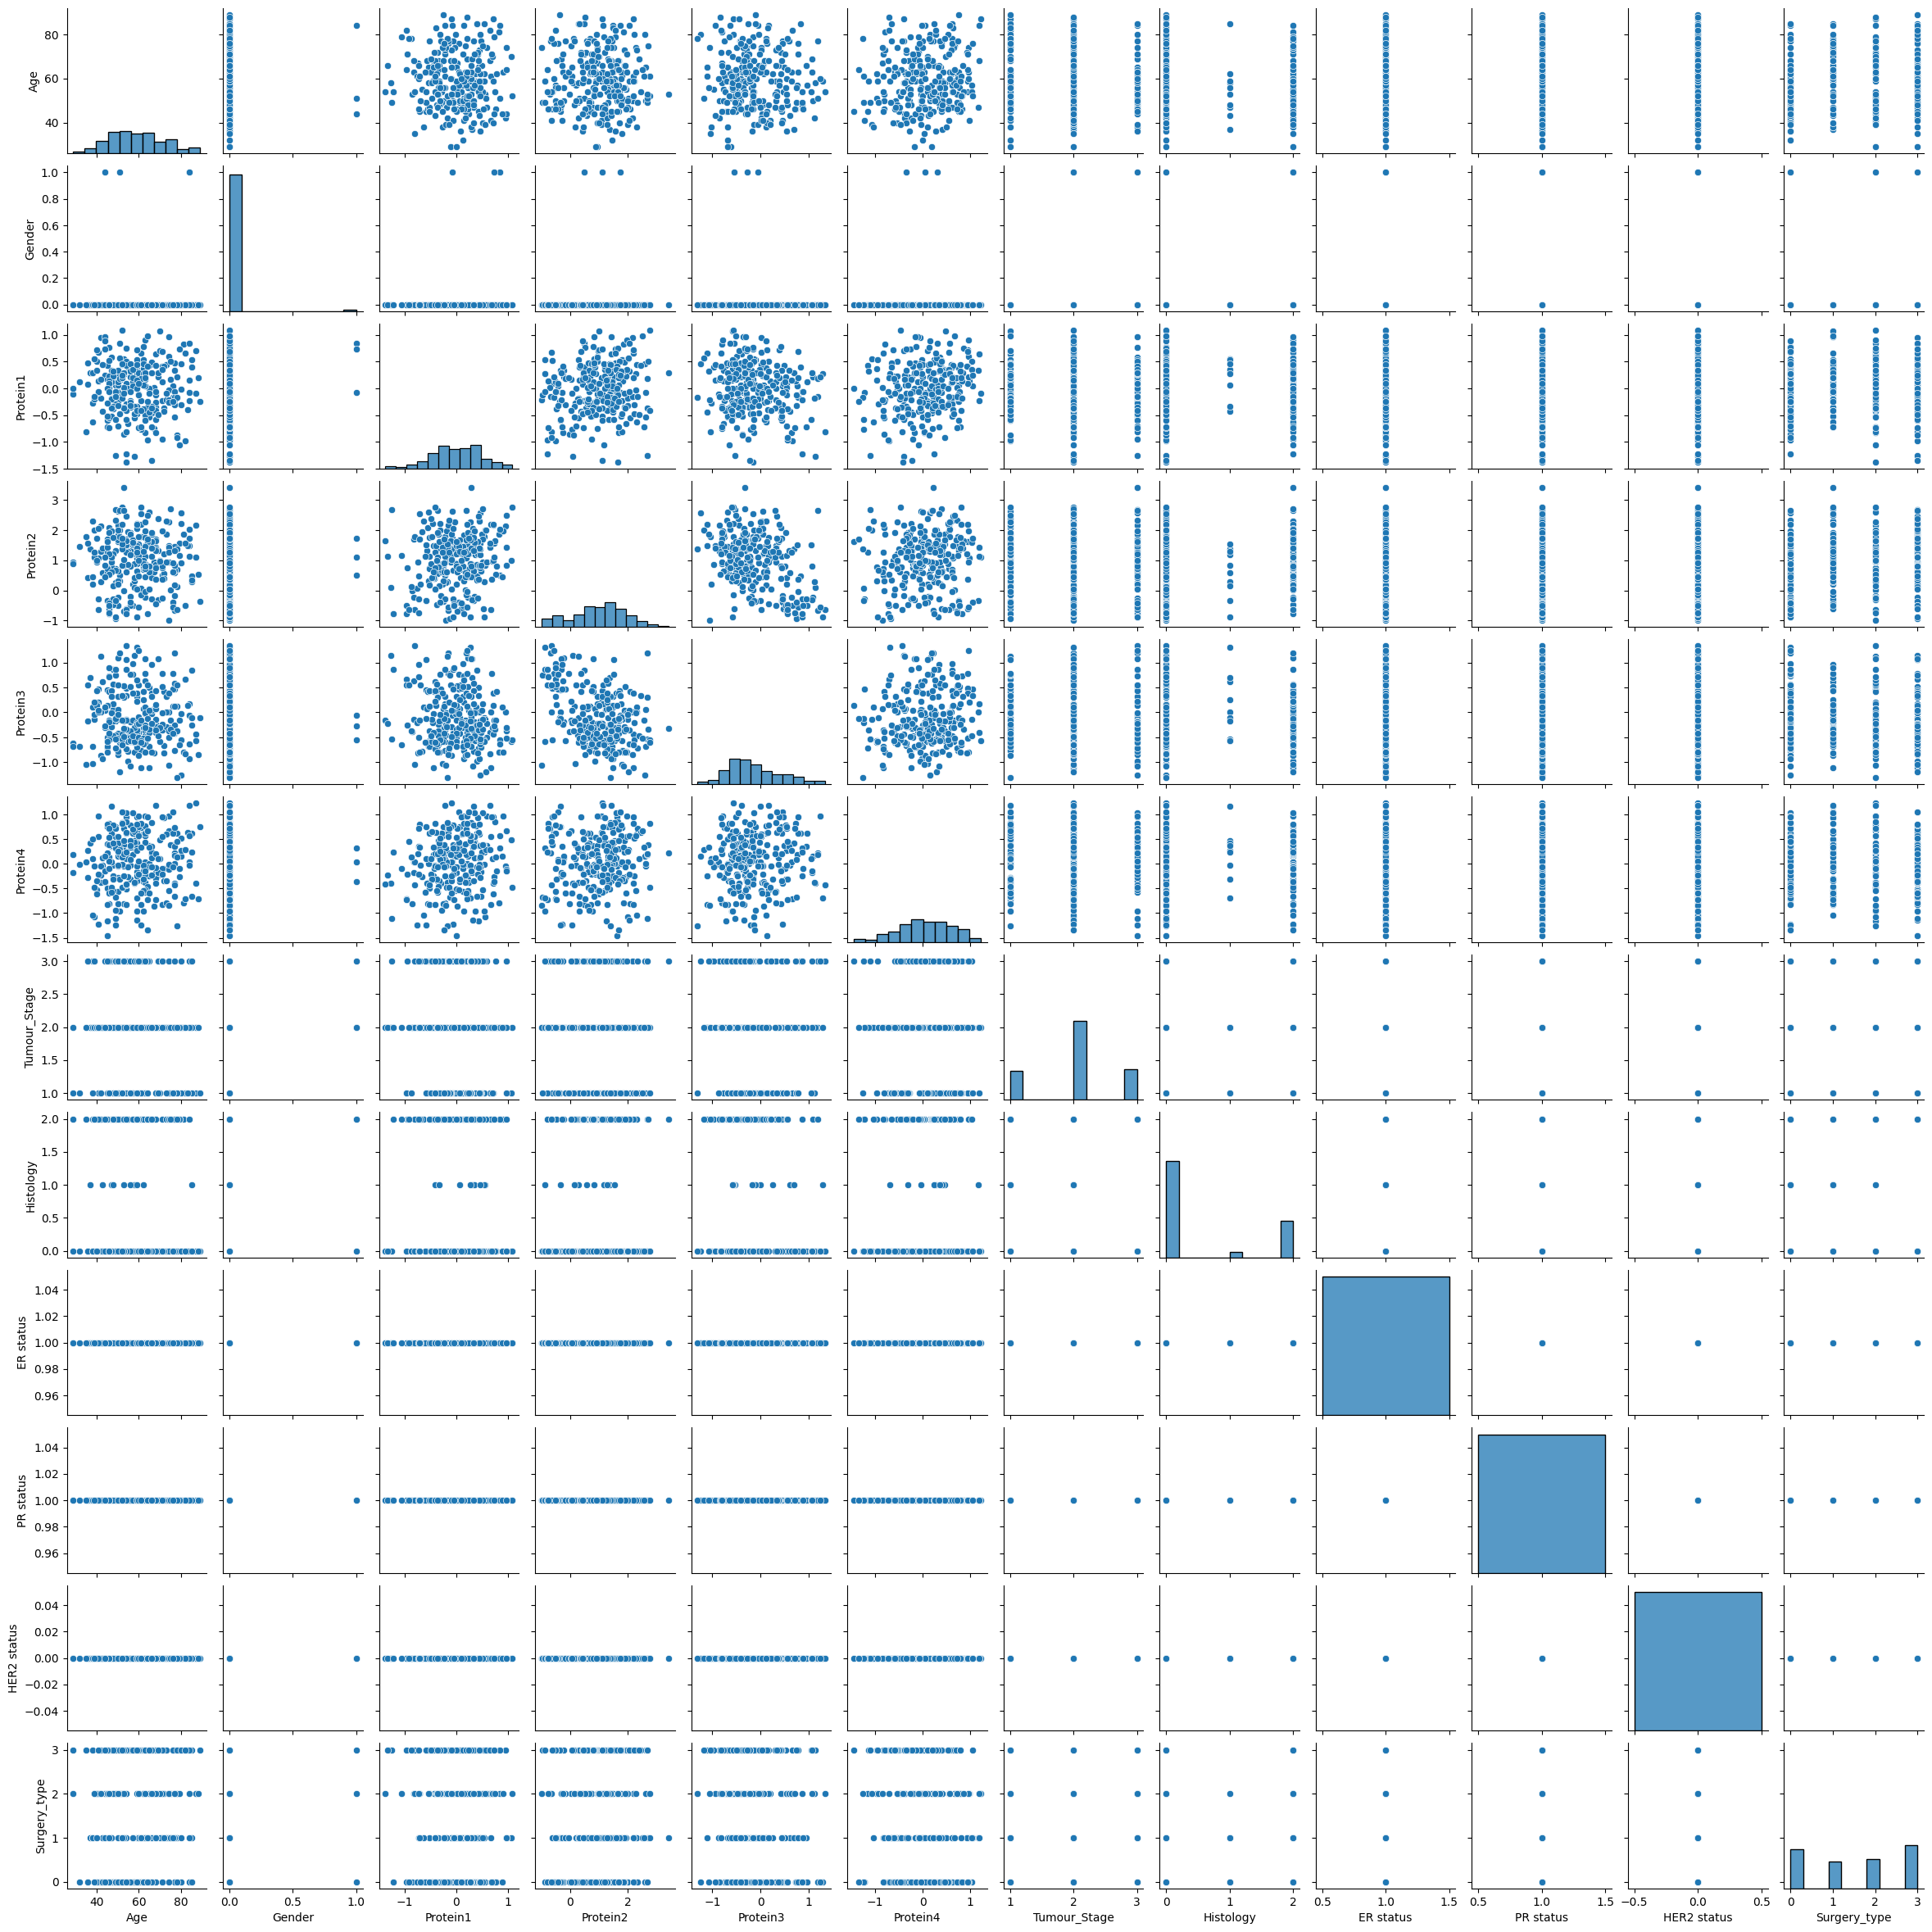

In [264]:
import seaborn as sns
sns.pairplot(breast_cancer_df, height=2)